In [47]:
#importing all the necessary library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
text_file_path = 'E:\\Untitled Folder\\New folder\\house_rental_data.txt'
df = pd.read_table(text_file_path, sep=',')

# Exploratory Data Analysis

In [49]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [50]:
df.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [51]:
df.reset_index(drop=True)
df=df.iloc[:, ~df.columns.str.contains('^Unnamed')]

In [52]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [54]:
df.shape

(645, 7)

In [55]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [56]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [57]:

df[df['Sqft']==0.00]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [58]:
df[df['Price']<=0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [59]:
df.rename(columns={'Living.Room':'Living Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [60]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [61]:
df['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [62]:
df['Price'].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

# Data Visulization

In [63]:
import seaborn as sns


<Axes: >

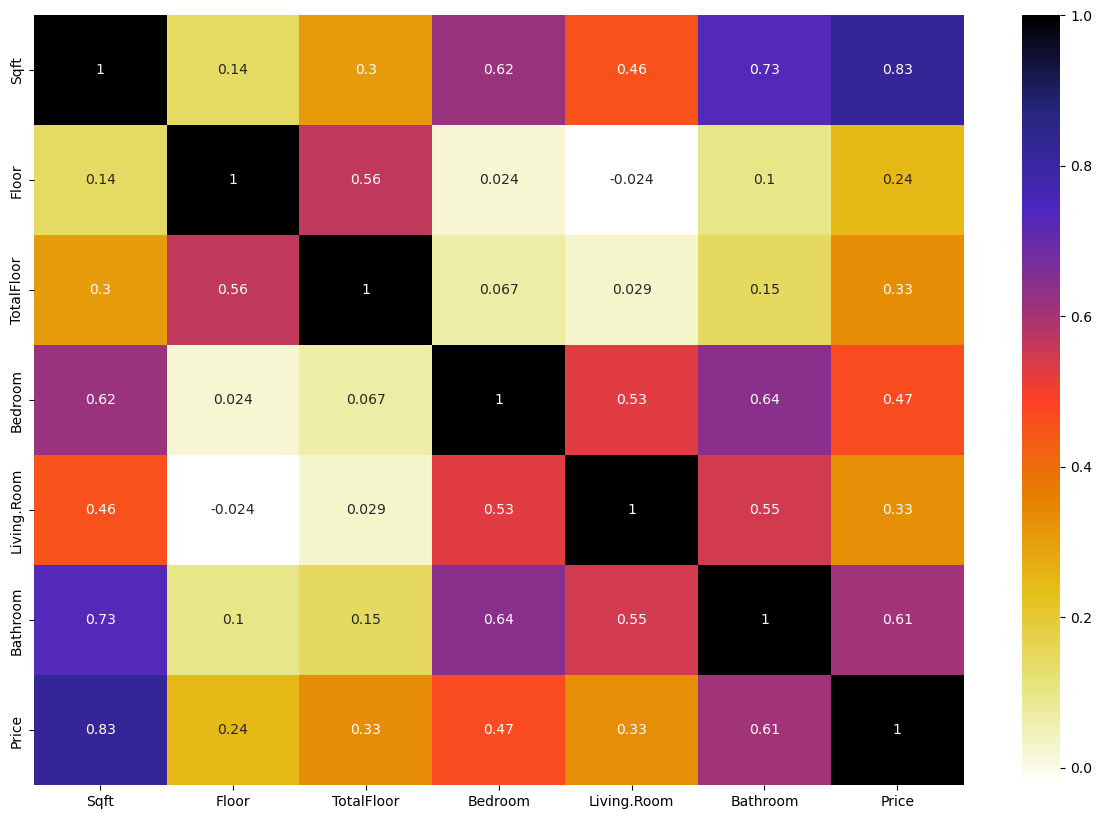

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap= plt.cm.CMRmap_r)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7256\853546789.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sqft'])


<Axes: xlabel='Sqft', ylabel='Density'>

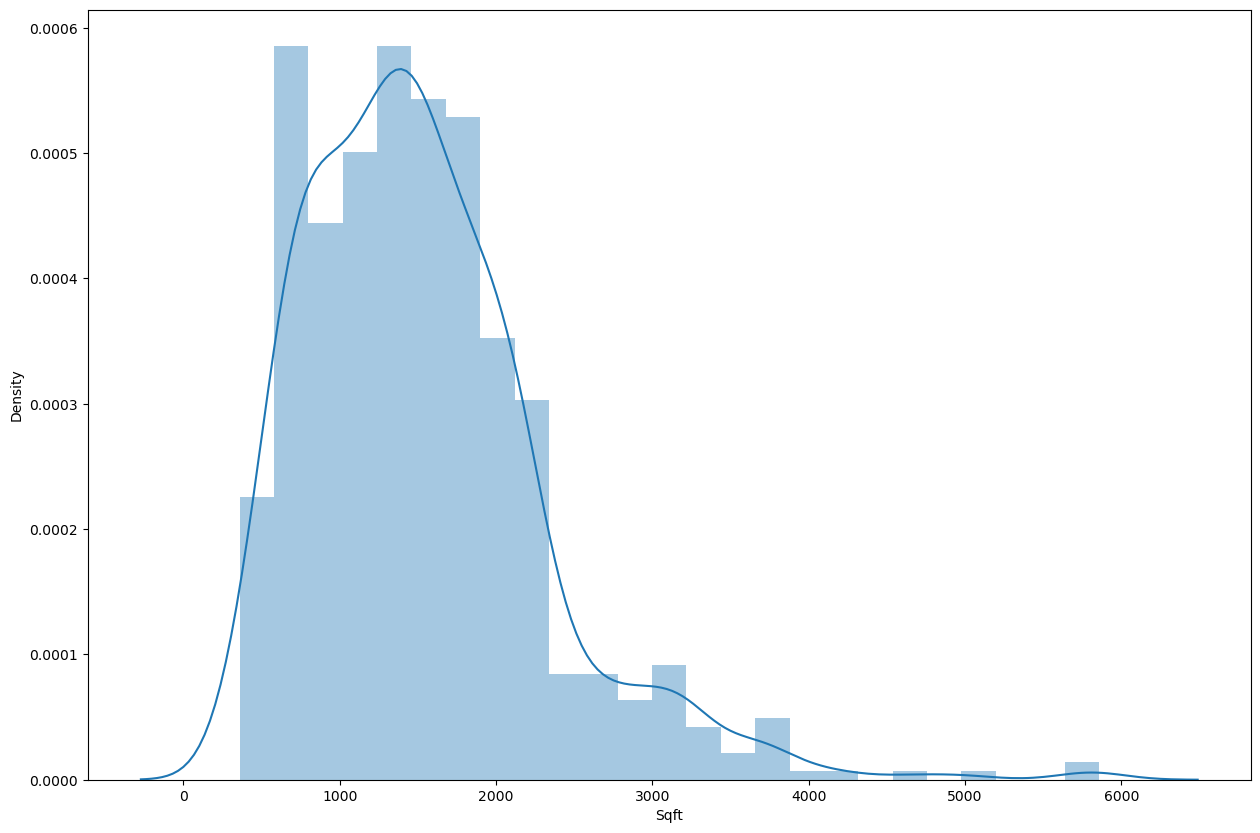

In [65]:
plt.figure(figsize=(15,10))
sns.distplot(df['Sqft'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_7256\2985771909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

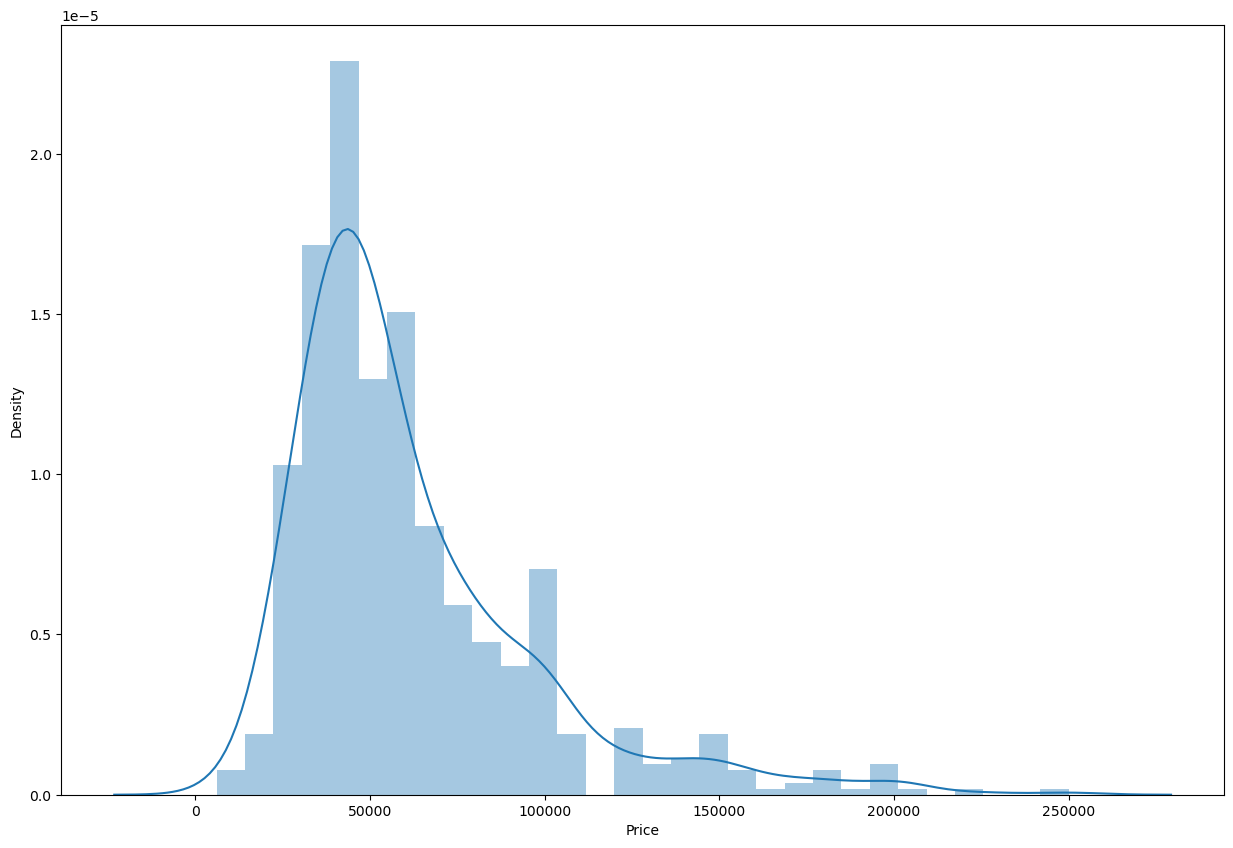

In [66]:
plt.figure(figsize=(15,10))
sns.distplot(df['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10d5e8e4670>,
 'caps': [<matplotlib.lines.Line2D at 0x10d5e8e4bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10d5e8e43a0>],
 'medians': [<matplotlib.lines.Line2D at 0x10d5e8e50f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10d5e8e5390>],
 'means': []}

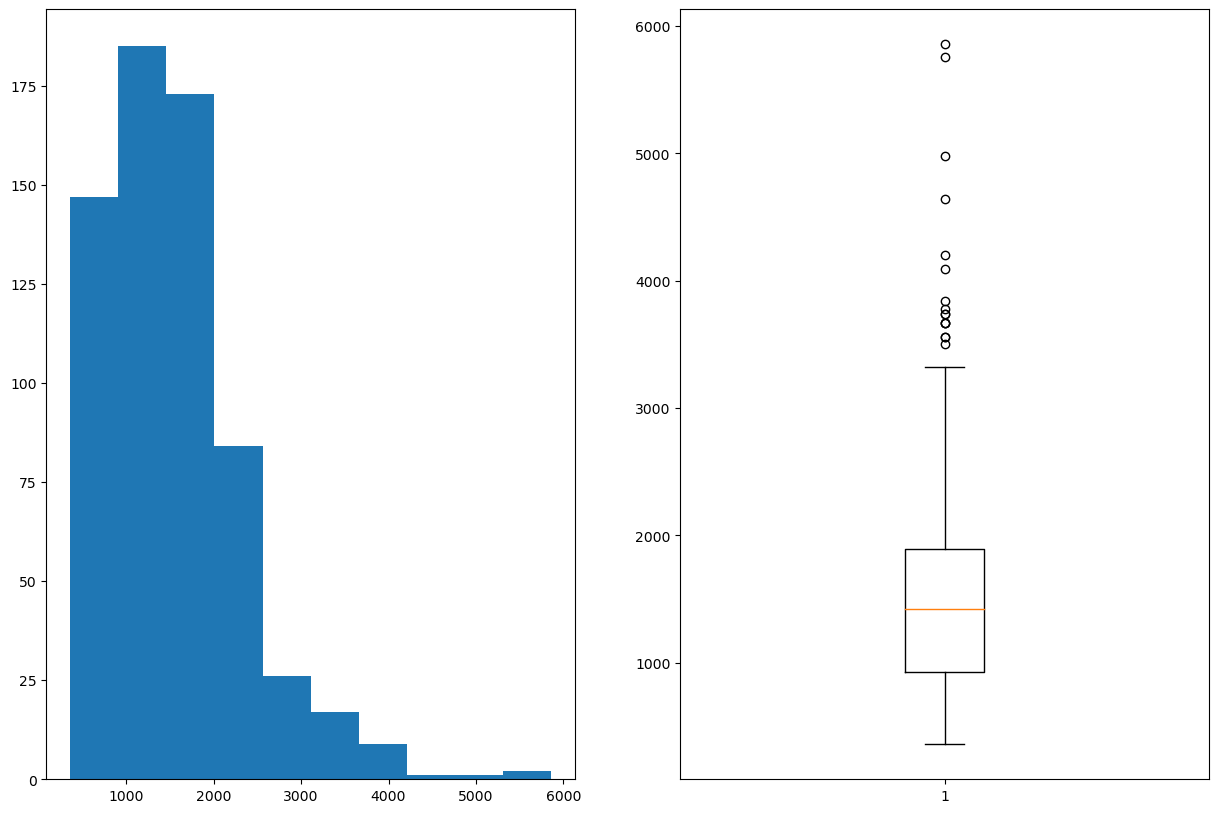

In [67]:
figs = plt.figure(figsize= (15,10))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)

x= df['Sqft']
ax1.hist(x)
ax2.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x10d5fa40ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x10d5fa41420>,
 'boxes': [<matplotlib.lines.Line2D at 0x10d5fa40c10>],
 'medians': [<matplotlib.lines.Line2D at 0x10d5fa41960>],
 'fliers': [<matplotlib.lines.Line2D at 0x10d5e928040>],
 'means': []}

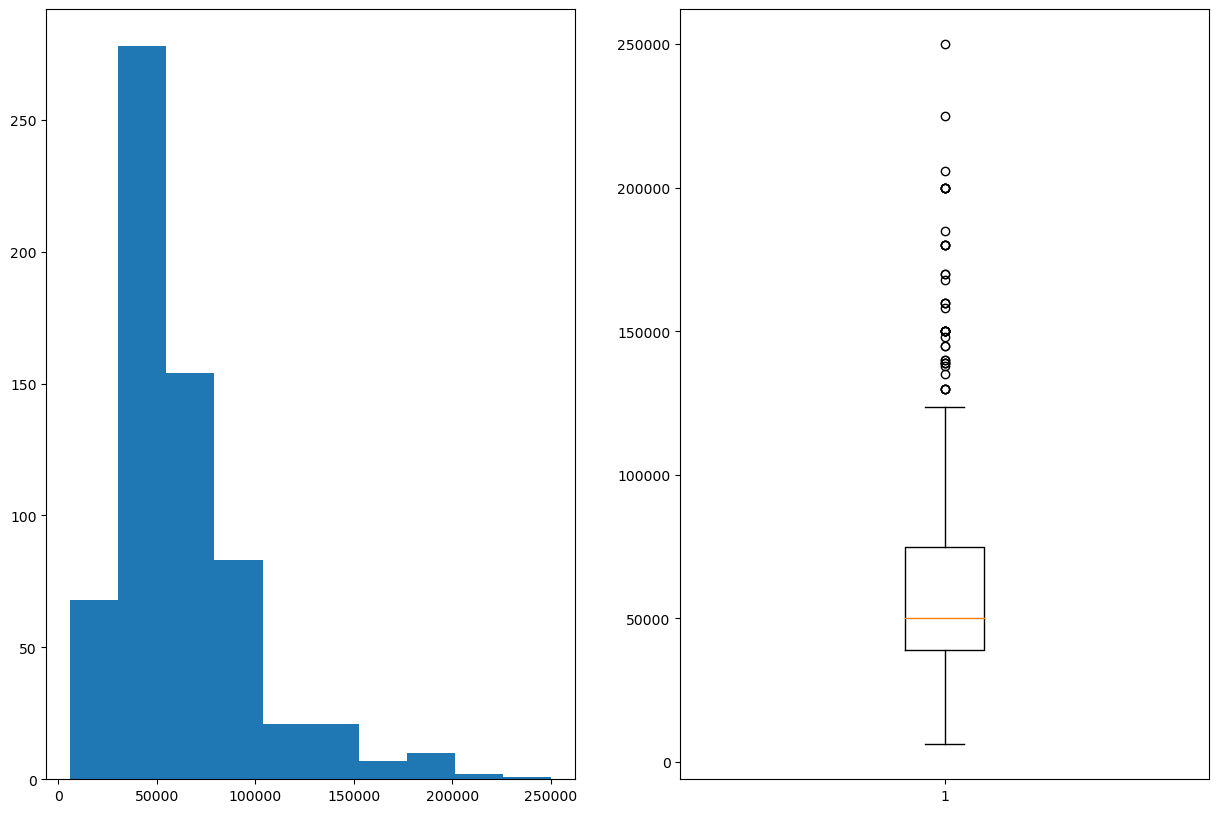

In [68]:
figs = plt.figure(figsize=((15,10)))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)

x= df['Price']

ax1.hist(x)
ax2.boxplot(x)

<Axes: xlabel='Sqft', ylabel='Price'>

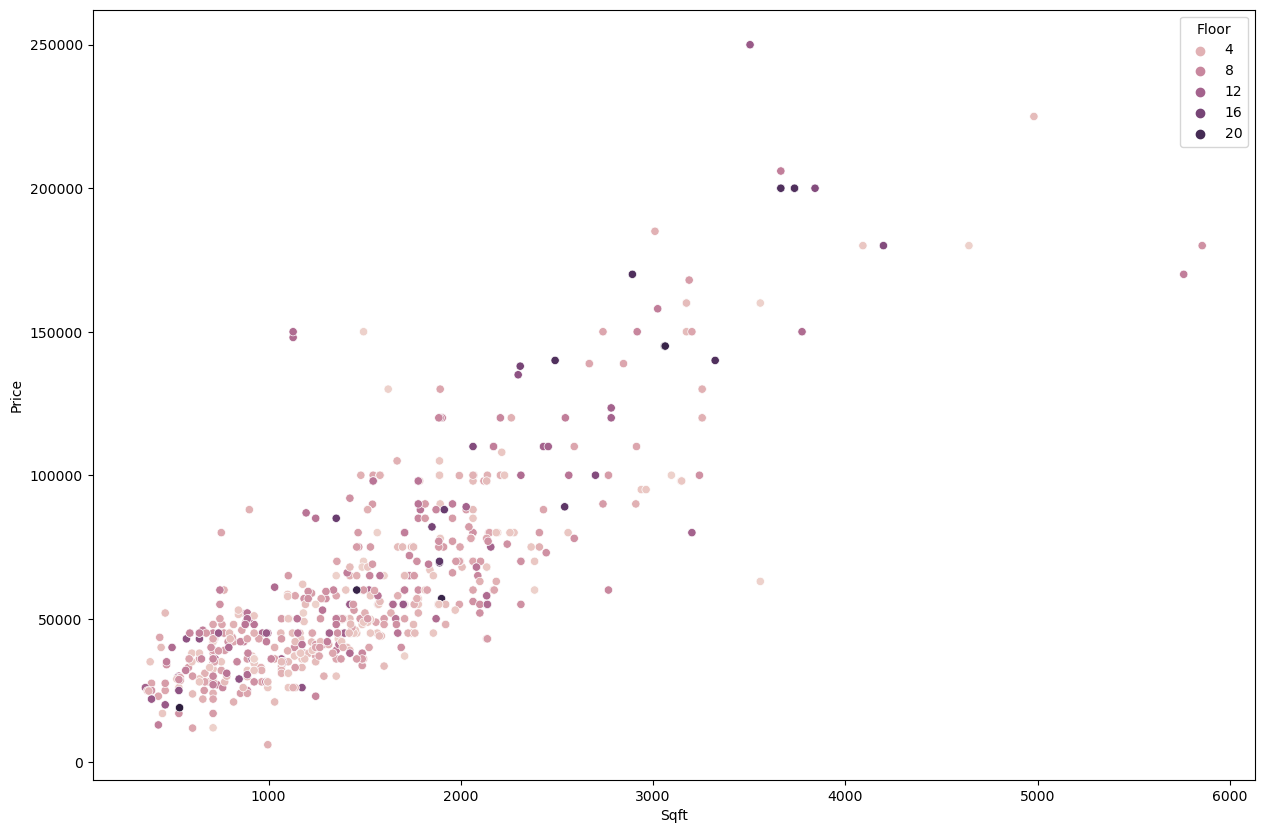

In [69]:
plt.figure(figsize= (15,10))
sns.scatterplot(data=df, x=df['Sqft'], y=df['Price'], hue='Floor')

<Axes: xlabel='Bathroom', ylabel='Price'>

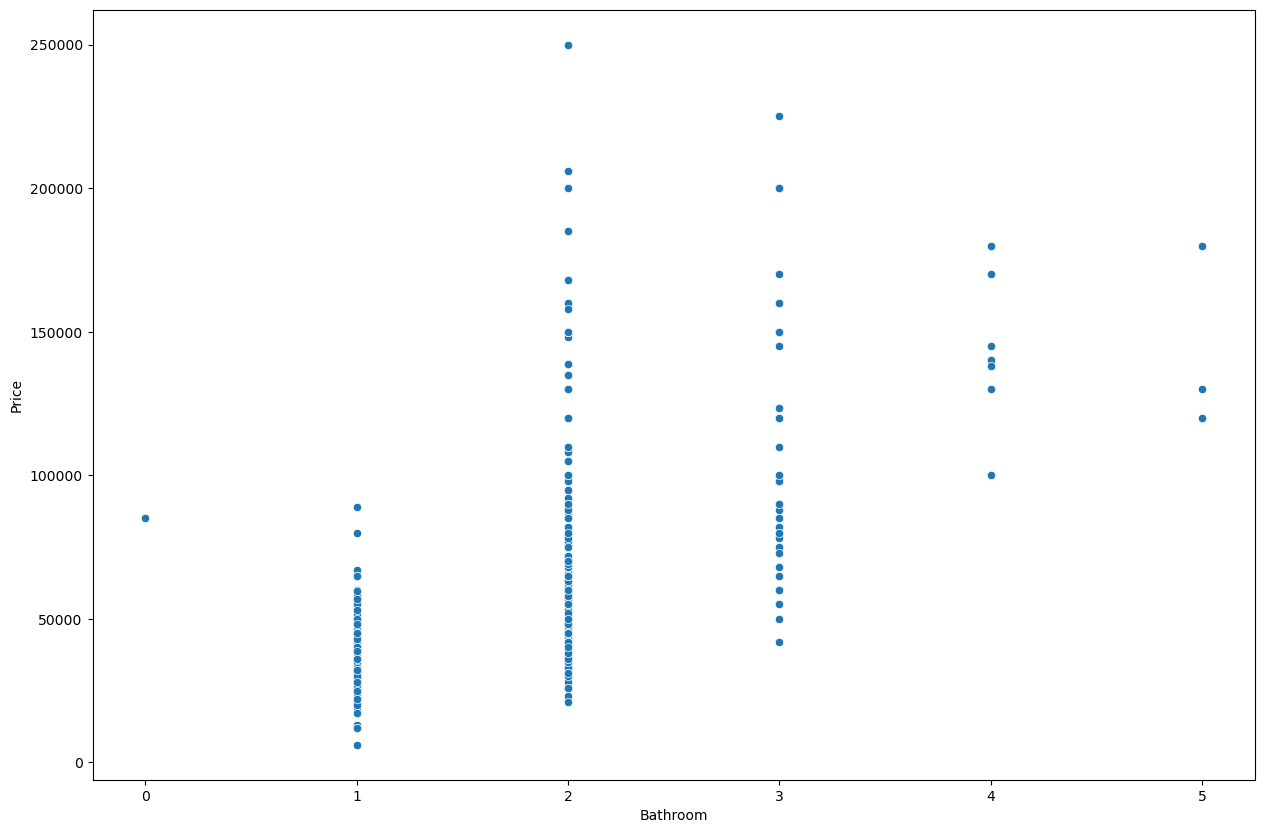

In [70]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x=df['Bathroom'], y=df['Price'])

# Removing Outlinear with the help Of Z score

In [73]:
from scipy import stats

z= np.abs(stats.zscore(df))
print(z)


         Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [74]:
print(np.where(z<3))

(array([  0,   0,   0, ..., 644, 644, 644], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [75]:
df = df[(z<3).all (axis=1)]

In [76]:
df.shape

(608, 7)


# Dividing Dependent And Independent Variables

In [87]:
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']

# Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Finding the best value of k and Data Modeling

In [91]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [92]:
# Finding a better value of k
rmse = []
for k in range(21):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)
    
    

RMSE for k = 1 is 26328.283215154326
RMSE for k = 2 is 21084.85069814616
RMSE for k = 3 is 19829.204040683715
RMSE for k = 4 is 19419.1095861487
RMSE for k = 5 is 18948.80694027991
RMSE for k = 6 is 18790.560447647727
RMSE for k = 7 is 18366.390447784284
RMSE for k = 8 is 18663.641228841956
RMSE for k = 9 is 18713.70761271392
RMSE for k = 10 is 18405.568966526338
RMSE for k = 11 is 18029.542976983106
RMSE for k = 12 is 17879.839568570995
RMSE for k = 13 is 17704.373696126946
RMSE for k = 14 is 17572.373970740202
RMSE for k = 15 is 17410.94863579384
RMSE for k = 16 is 17255.228436644207
RMSE for k = 17 is 17122.559647690952
RMSE for k = 18 is 16983.25871458523
RMSE for k = 19 is 17075.393565218674
RMSE for k = 20 is 17212.11710498381
RMSE for k = 21 is 17498.591231324368


<Axes: >

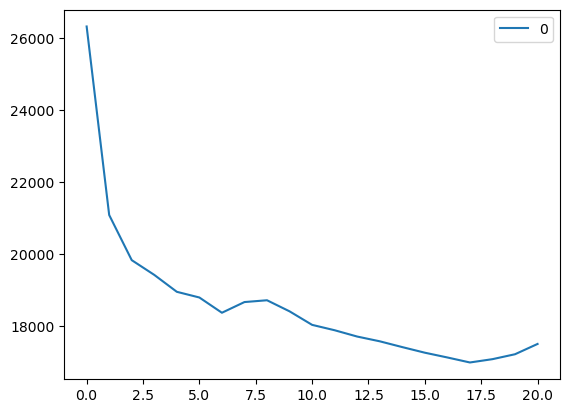

In [93]:
curve = pd.DataFrame(rmse)
curve.plot()

#At k= 6, the RMSE is approximately 17554, and shoots up on further increasing the k value. 
#We can safely say that k=6 will give us the best result in this case.